# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [23]:
# student details example: John S. 9812
#                       student details 1: Afik A. 7310
# (if exists)           student details 2: Adi H. 3389
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chatgpt
Goal: understanding the task
Propmpt1: ם )60 נקודות + אפשרות של עד 10 נקודות בונוס(
• ניהול הניסויים עם validation cross( 20 נקודות( - בחירת פרמוטציה המיטבית -cross-fold5-
grid search בשיטת validation
o בחירת פרמוטציה של ה- engineering Feature, מודל הלמידה ו - parameter hyper
.grid search בשיט ; תסביר לי את ההגדרות שמופיעות פה

    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [83]:
import numpy as np
import scipy
import pandas as pd
from sklearn import datasets, model_selection, metrics 
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


from plotnine import ggplot, aes, geom_line, geom_point  
import pygal
from bokeh.plotting import figure, show  
import matplotlib.pyplot as plt
import seaborn as sns


import string
import re
import math
import statistics

In [31]:
# load files
train_df = pd.read_csv('housing_train.csv')
test_df = pd.read_csv('housing_test.csv')

# presenting 5 first rows of each file
print("Train Set:")
print(train_df.head())

print("\nTest Set:")
print(test_df.head())

Train Set:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  

Test Set:
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.009836    

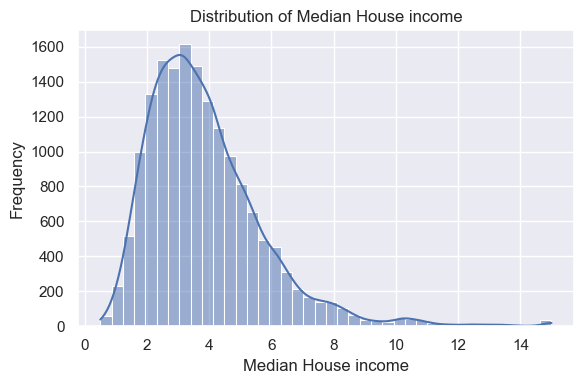

In [99]:
# Plot 1: Distribution of the target variable (Median House Income) - histogram

sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.histplot(train_df['MedInc'], bins=40, kde=True) 
plt.title('Distribution of Median House income')
plt.xlabel('Median House income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Purpose: Understand how the target variable (MedHouseIncome) is distributed.
#Insight: The distribution is left-skewed, indicating that most incomes are valued at mid-to-low range

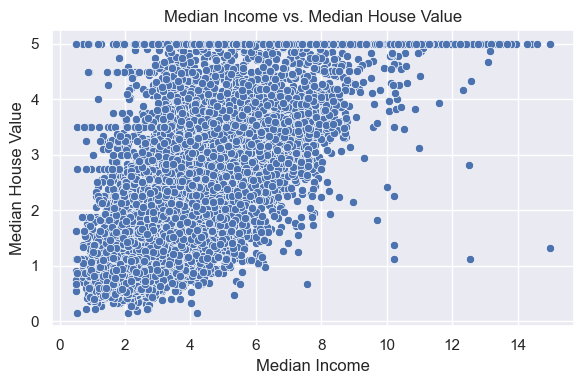

In [33]:
# Plot 2: Scatter plot - Median Income vs. Median House Value

sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=train_df)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

#Purpose: Visualize the relationship between household income and home value.
#Insight: There's a positive trend—higher income areas tend to have higher median house values. 


In [34]:
# Table: Average house value by binned house age
train_df['HouseAgeBin'] = pd.cut(train_df['HouseAge'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10','11-20','21-30','31-40','41-50','51-60'])
avg_val_by_age = train_df.groupby('HouseAgeBin')['MedHouseVal'].mean().reset_index()
avg_val_by_age

#Purpose: Investigate how age of buildings affects house value.
#Insight:older buildings (51–60 years) have the highest average value.

C:\Users\afik3\AppData\Local\Temp\ipykernel_20816\2338780054.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,HouseAgeBin,MedHouseVal
0,0-10,2.009635
1,11-20,1.902579
2,21-30,2.060587
3,31-40,2.062222
4,41-50,2.078012
5,51-60,2.720314


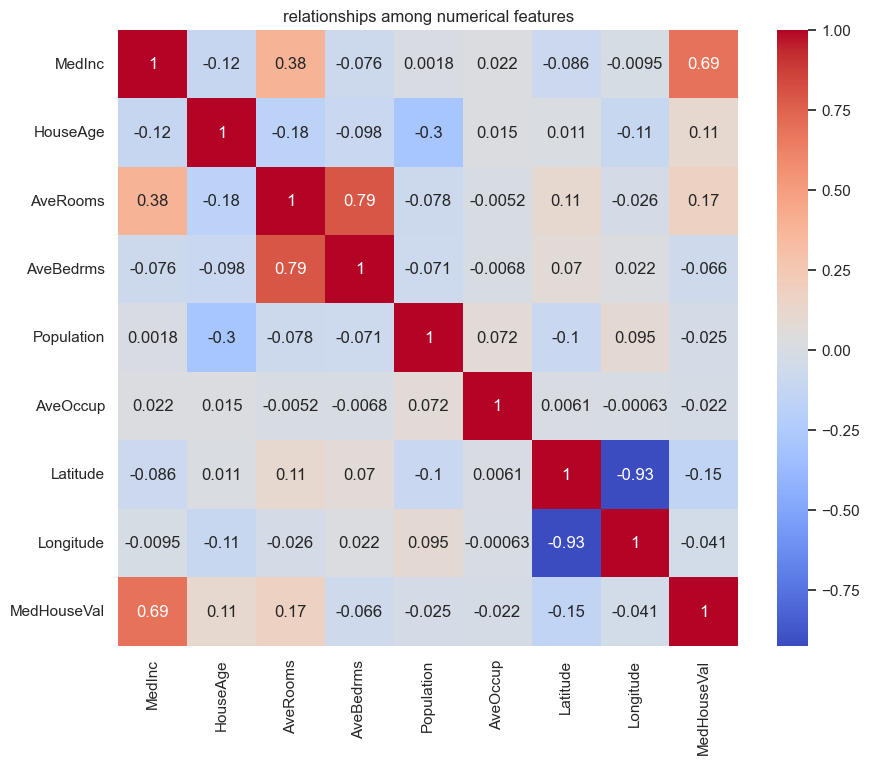

In [56]:
# Plot 3: Heat-map - relationships among all numerical features  

sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('relationships among numerical features')
plt.show()


#Purpose: Reveal relationships among numerical features.
#Insight: MedInc (income) has a strong positive correlation with MedHouseVal.

## Part 3 - Experiments
You could add as many code cells as needed

In [113]:
# We compared three versions of the MedInc feature — raw, log-transformed, and standardized 
# using a linear regression model with 5-fold cross-validation to evaluate which transformation yields the best performance.
# The results showed the log-transformed MedInc achieved the lowest mean squared error (MSE), indicating it provides the best fit for the model.

X1 = train_df[['MedInc']]
X2 = np.log1p(train_df[['MedInc']])
X3 = StandardScaler().fit_transform(train_df[['MedInc']])
y = train_df['MedHouseVal']

model = LinearRegression()
score1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_squared_error').mean()
score2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_squared_error').mean()
score3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_squared_error').mean()

print("Raw MedInc:", -score1)
print("Log MedInc:", -score2)
print("Scaled MedInc:", -score3)
# the best model is score2 - log feature engineering  

Raw MedInc: 0.7017340790219933
Log MedInc: 0.7342691314827373
Scaled MedInc: 0.7017340790219933


In [115]:
train_df['LogMedInc'] = np.log1p(train_df['MedInc'])

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation